# EDA & Visualization of POS_CASH_BALANCE

#### THIS IS JUST A BRIEF ANALYSYS! NOT FINAL!
#### Presented to you, by Bram

## Viable Features
- `SK_ID_CURR` (ID unik klien)
- `MONTHS_BALANCE` (prev month balance)
- `CNT_INSTALMENT` (jumlah cicilan)
- `CNT_INSTALMENT_FUTURE` (jumlah cicilan di masa depan)
- `NAME_CONTRACT_STATUS` (status kontrak)

## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

## Import Data

In [5]:
df_master = pd.read_csv('POS_CASH_balance.csv')

In [5]:
df_master.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [11]:
df_master.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [15]:
df_master.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [22]:
list_item_master = []

for col in df_master.columns:
    list_item_master.append([
        col,                       
        df_master[col].dtype,       
        df_master[col].isna().sum(),
        100 * df_master[col].isna().sum() / len(df_master[col]), 
        df_master[col].nunique(), 
        df_master[col].unique()[:5] 
    ])

desc_df = pd.DataFrame(data=list_item_master, columns=[
    'feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'
])

desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,SK_ID_PREV,int64,0,0.000000,936325,"[1803195, 1715348, 1784872, 1903291, 2341044]"
1,SK_ID_CURR,int64,0,0.000000,337252,"[182943, 367990, 397406, 269225, 334279]"
2,MONTHS_BALANCE,int64,0,0.000000,96,"[-31, -33, -32, -35, -38]"
3,CNT_INSTALMENT,float64,26071,0.260675,73,"[48.0, 36.0, 12.0, 24.0, 60.0]"
4,CNT_INSTALMENT_FUTURE,float64,26087,0.260835,79,"[45.0, 35.0, 9.0, 42.0, 12.0]"
5,NAME_CONTRACT_STATUS,object,0,0.000000,9,"[Active, Completed, Signed, Approved, Returned..."
6,SK_DPD,int64,0,0.000000,3400,"[0, 1, 2, 4, 3]"
7,SK_DPD_DEF,int64,0,0.000000,2307,"[0, 1, 2, 4, 3]"


In [7]:
df_train = pd.read_csv('application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_to_merge = df_train.filter(items = df_train.columns[:16])
df_to_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment


In [11]:
df_merged = df_master.merge(df_to_merge, on='SK_ID_CURR', how='inner')

df_merged.sample(5, random_state = 0)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,TARGET,NAME_CONTRACT_TYPE,...,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
4503319,2165603,192298,-17,12.0,10.0,Active,0,0,0,Cash loans,...,1,337500.0,835380.0,40189.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents
5836165,1732661,139579,-55,18.0,9.0,Active,0,0,0,Cash loans,...,1,90000.0,253737.0,16344.0,229500.0,Unaccompanied,Working,Higher education,Married,Co-op apartment
5827086,2102439,451774,-55,6.0,4.0,Active,0,0,0,Cash loans,...,2,360000.0,450000.0,25128.0,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
6011920,1547467,218461,-53,8.0,0.0,Active,699,0,0,Cash loans,...,0,180000.0,1180899.0,46962.0,1012500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment
7721485,1374922,418068,-3,6.0,1.0,Active,0,0,1,Cash loans,...,1,112500.0,269550.0,24853.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment


Berdasarkan informasi diatas, dapat diperoleh beberapa hal berikut:

1. **Sebaran Data Tidak Normal**:
   - Kolom `CNT_INSTALMENT` dan `CNT_INSTALMENT_FUTURE` memiliki nilai maksimum yang jauh lebih besar dibandingkan dengan nilai mean, median (Q2), dan Q3. Ini mengindikasikan bahwa terdapat kemungkinan **outlier** atau **kesalahan input data** pada kedua kolom ini.
   - Kolom `SK_DPD` dan `SK_DPD_DEF` juga menunjukkan perbedaan signifikan antara nilai maksimum dengan nilai mean dan Q3, yang menunjukkan bahwa data pada kolom ini mungkin memiliki **distribusi yang skewed** atau terdapat beberapa nilai yang sangat tinggi dibandingkan dengan yang lainnya, sehingga menyebabkan ketidakseimbangan sebaran data.

2. **Nilai Minimum dan Sebaran**:
   - Kolom `MONTHS_BALANCE` memiliki rentang nilai yang cukup besar dari -96 hingga -1, yang menunjukkan bahwa data ini mungkin berisi catatan historis dari bulan ke bulan hingga saat ini.
   - Nilai-nilai minimum pada kolom `CNT_INSTALMENT` dan `CNT_INSTALMENT_FUTURE` adalah 0 dan 1, yang menunjukkan bahwa terdapat beberapa kontrak dengan jumlah angsuran yang sangat rendah atau mungkin sudah hampir selesai.

Berdasarkan tabel deskripsi pada data kategori:

- Kolom `NAME_CONTRACT_STATUS` memiliki **9 nilai unik**, yang dapat dianggap wajar untuk menggambarkan berbagai status kontrak yang mungkin ada, seperti **Active**, **Completed**, **Signed**, dll.
- Sebaran frekuensi nilai pada kolom `NAME_CONTRACT_STATUS` tidak terlihat timpang, yang menunjukkan bahwa setiap kategori kontrak memiliki representasi yang cukup proporsional di dalam dataset, tanpa ada ketimpangan yang signifikan di antara berbagai kategori status kontrak.

Secara keseluruhan, terdapat indikasi ketidakseimbangan data dalam beberapa kolom numerik yang mungkin memerlukan perlakuan khusus, seperti identifikasi dan penanganan outlier atau normalisasi data. Sementara itu, kolom kategori menunjukkan distribusi yang cukup wajar tanpa indikasi ketimpangan nilai yang berlebihan.

## Distribusi Data

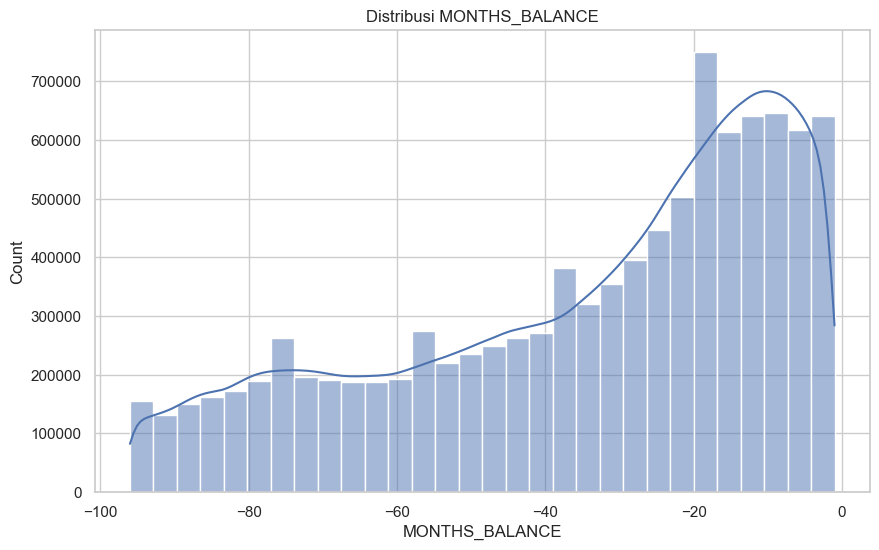

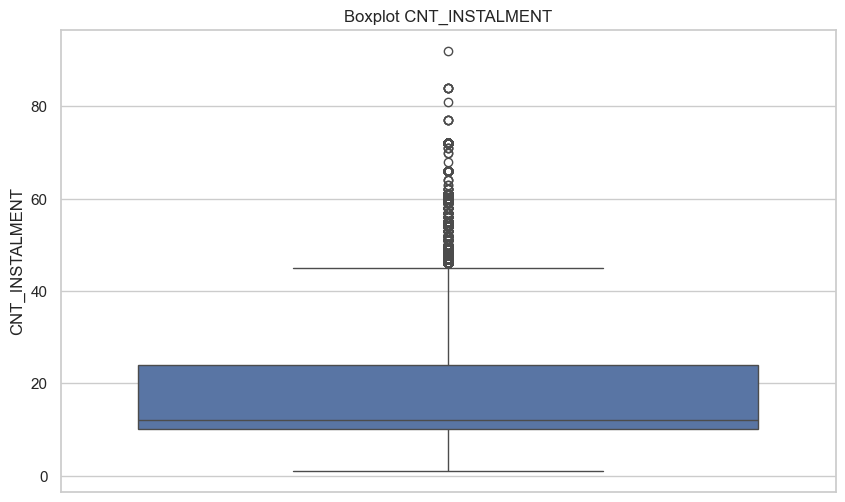

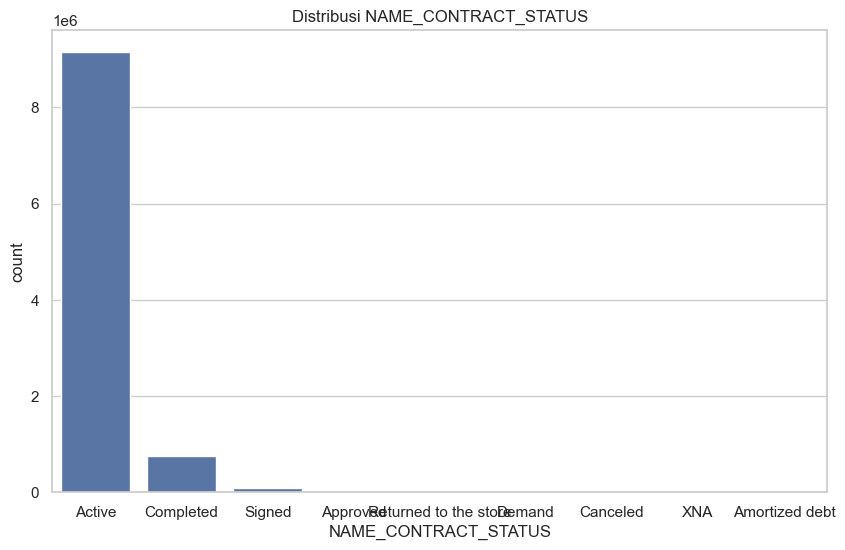

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_master['MONTHS_BALANCE'], kde=True, bins=30)
plt.title('Distribusi MONTHS_BALANCE')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='CNT_INSTALMENT', data=df_master)
plt.title('Boxplot CNT_INSTALMENT')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', data=df_master)
plt.title('Distribusi NAME_CONTRACT_STATUS')
plt.show()

## Korelasi Antar Atribut

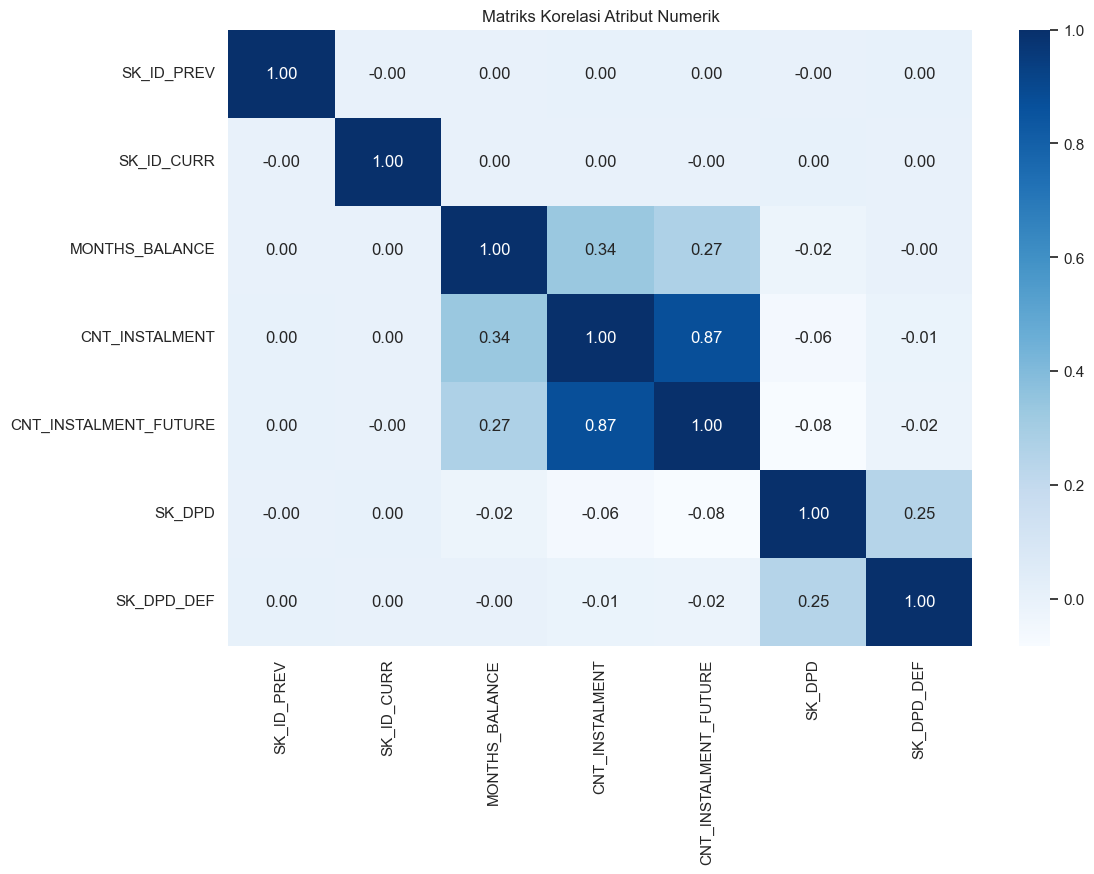

In [30]:
plt.figure(figsize=(12, 8))
numeric_df = df_master.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriks Korelasi Atribut Numerik')
plt.show()

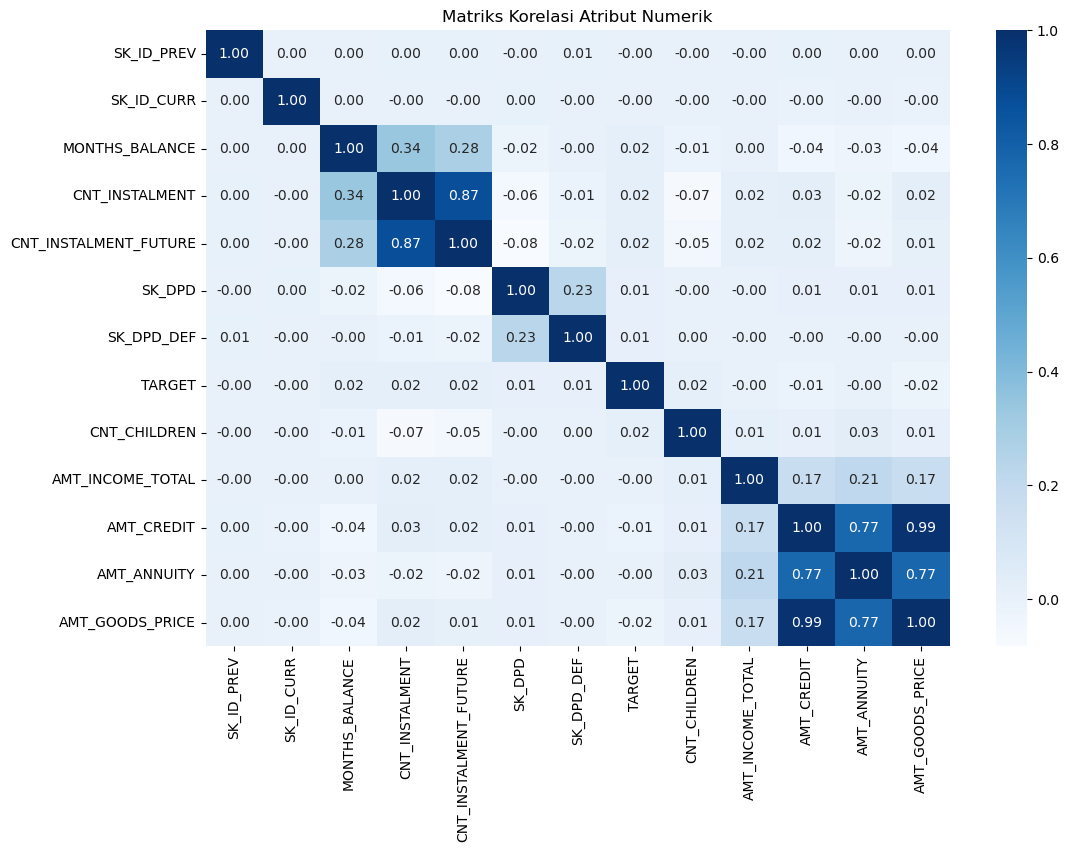

In [36]:
plt.figure(figsize=(12, 8))
numeric_df = df_merged.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriks Korelasi Atribut Numerik')
plt.show()

**even after merging 15 features, nothing's changed**

## Analisis Hubungan Antar Fitur

### CNT_INSTALMENT dengan NAME_CONTRACT_STATUS

C:\Users\brama\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


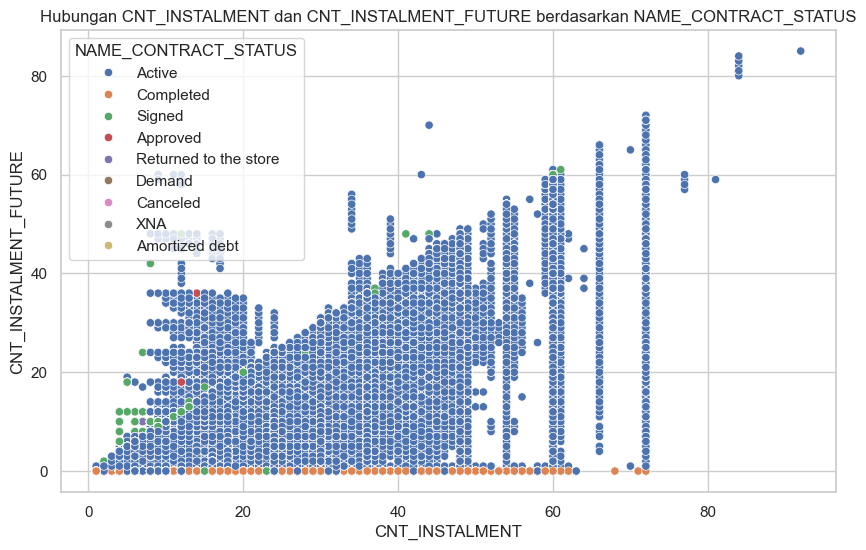

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CNT_INSTALMENT', y='CNT_INSTALMENT_FUTURE', hue='NAME_CONTRACT_STATUS', data=df_master)
plt.title('Hubungan CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE berdasarkan NAME_CONTRACT_STATUS')
plt.show()

### CNT_INSTALMENT dengan TARGET

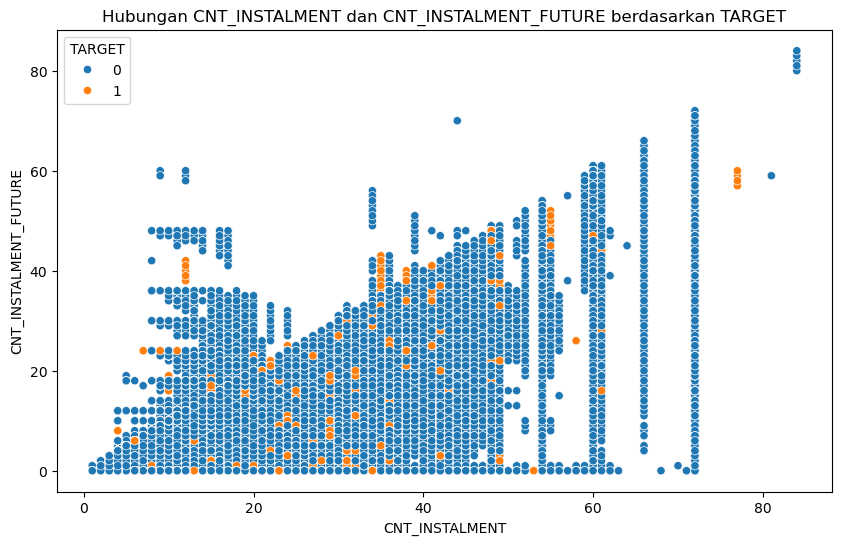

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CNT_INSTALMENT', y='CNT_INSTALMENT_FUTURE', hue='TARGET', data=df_merged)
plt.title('Hubungan CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE berdasarkan TARGET')
plt.show()

### Pair Plot

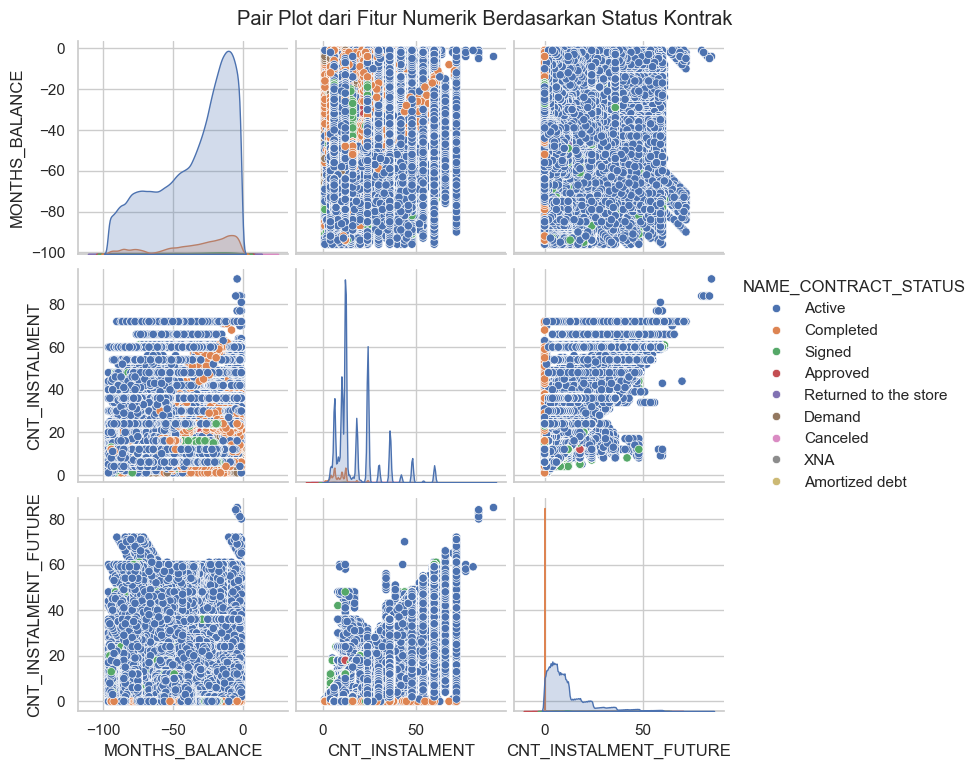

In [43]:
sns.pairplot(df_master, vars=['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], hue='NAME_CONTRACT_STATUS')
plt.suptitle('Pair Plot dari Fitur Numerik Berdasarkan Status Kontrak', y=1.02)
plt.show()

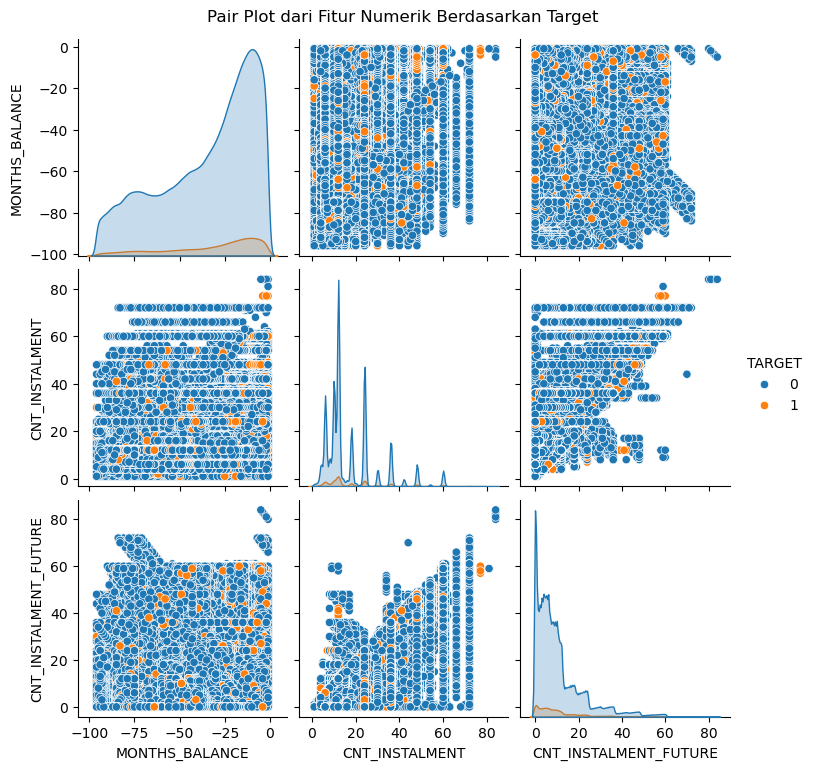

In [16]:
sns.pairplot(df_merged, vars=['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], hue='TARGET')
plt.suptitle('Pair Plot dari Fitur Numerik Berdasarkan Target', y=1.02)
plt.show()

### CNT_INSTALMENT Berdasarkan Status Kontrak

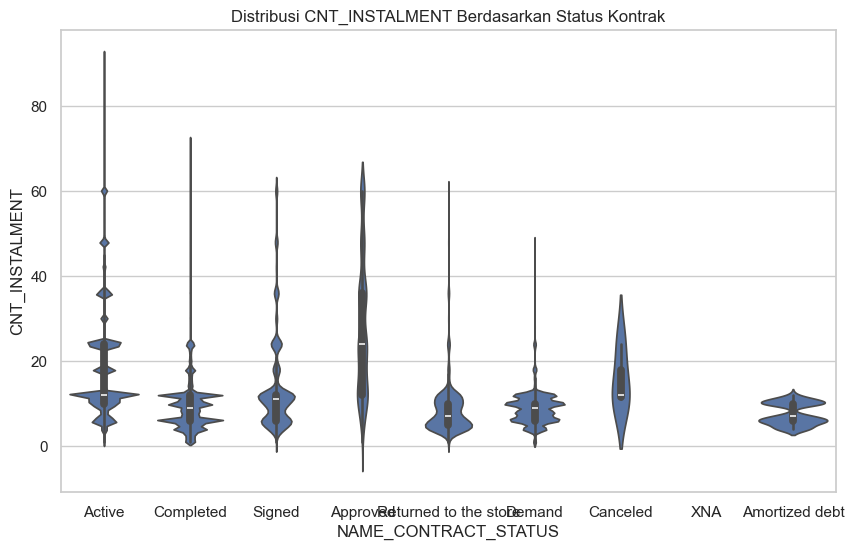

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='NAME_CONTRACT_STATUS', y='CNT_INSTALMENT', data=df_master)
plt.title('Distribusi CNT_INSTALMENT Berdasarkan Status Kontrak')
plt.show()

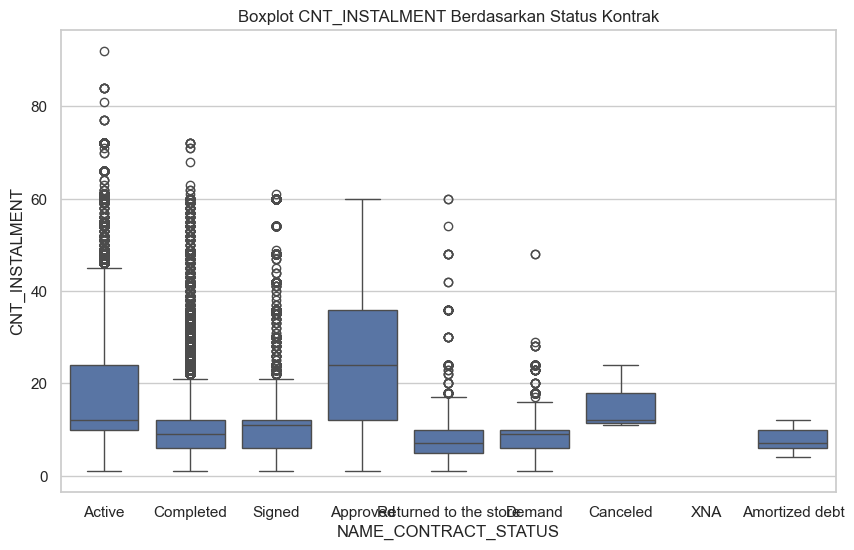

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='CNT_INSTALMENT', data=df_master)
plt.title('Boxplot CNT_INSTALMENT Berdasarkan Status Kontrak')
plt.show()

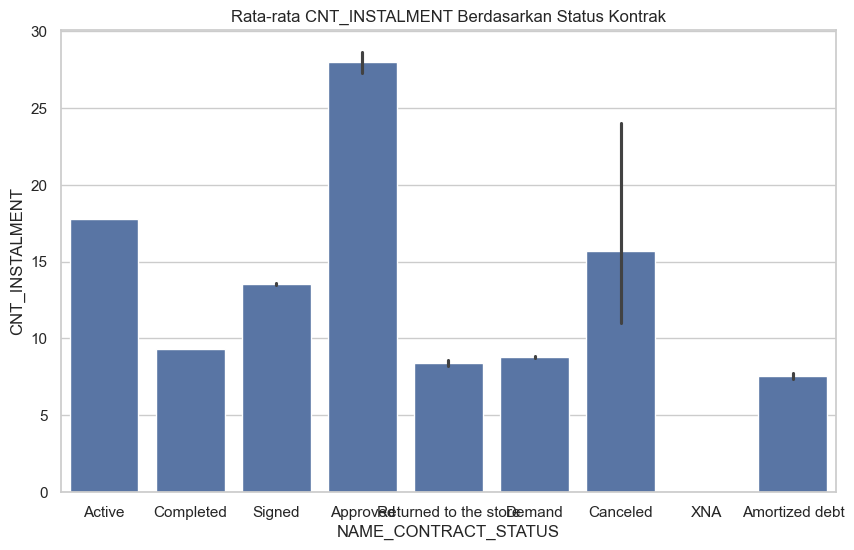

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='NAME_CONTRACT_STATUS', y='CNT_INSTALMENT', data=df_master)
plt.title('Rata-rata CNT_INSTALMENT Berdasarkan Status Kontrak')
plt.show()

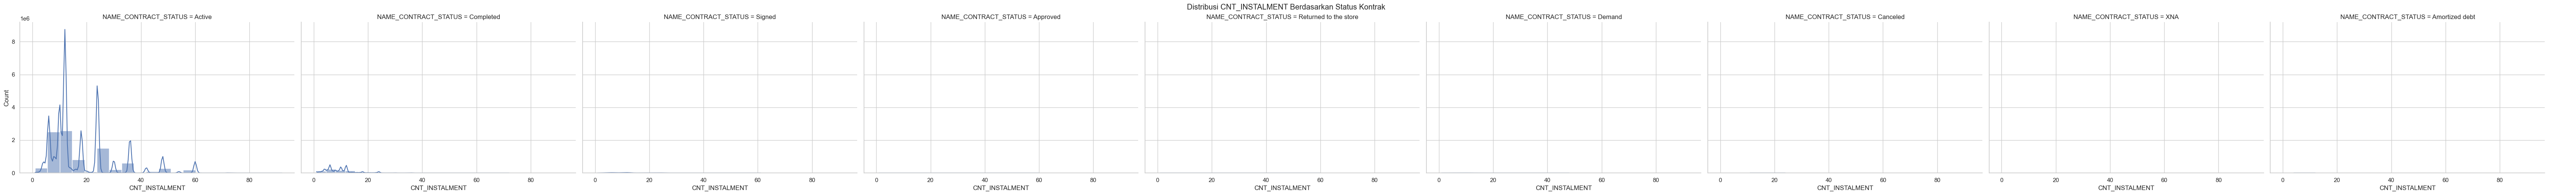

In [57]:
g = sns.FacetGrid(df_master, col="NAME_CONTRACT_STATUS", height=5, aspect=1.5)
g.map(sns.histplot, "CNT_INSTALMENT", bins=20, kde=True)
g.add_legend()
plt.suptitle('Distribusi CNT_INSTALMENT Berdasarkan Status Kontrak', y=1.02)
plt.show()

### CNT Instalment berdasarkan Target

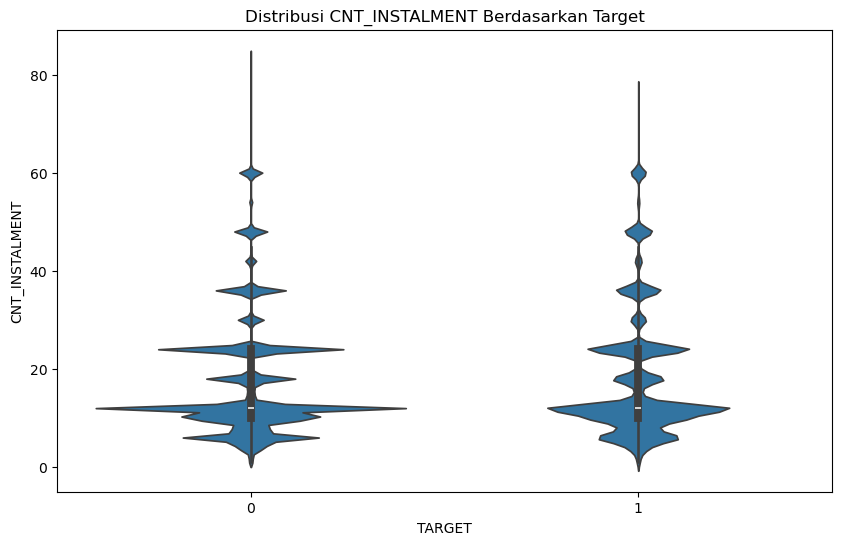

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='TARGET', y='CNT_INSTALMENT', data=df_merged)
plt.title('Distribusi CNT_INSTALMENT Berdasarkan Target')
plt.show()

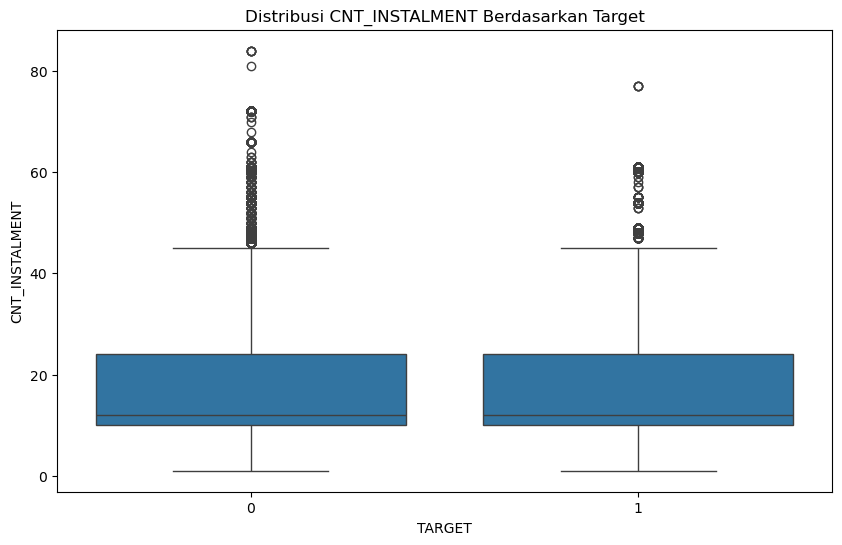

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='CNT_INSTALMENT', data=df_merged)
plt.title('Distribusi CNT_INSTALMENT Berdasarkan Target')
plt.show()

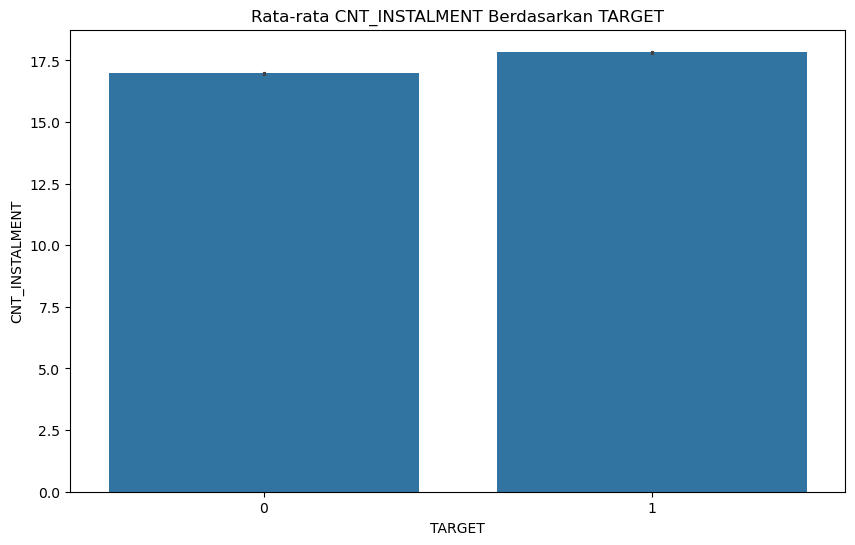

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='TARGET', y='CNT_INSTALMENT', data=df_merged)
plt.title('Rata-rata CNT_INSTALMENT Berdasarkan TARGET')
plt.show()

### CNT Instalment dengan CNT_INSTALMENT_FUTURE

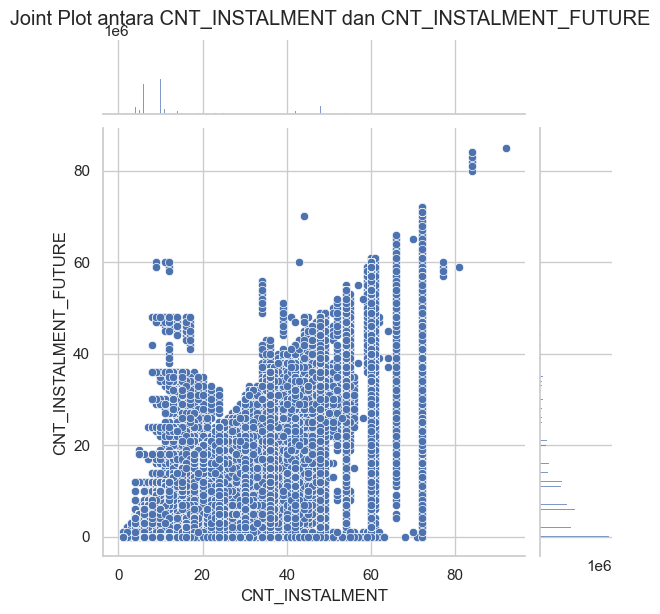

In [63]:
sns.jointplot(x='CNT_INSTALMENT', y='CNT_INSTALMENT_FUTURE', data=df_master, kind='scatter')
plt.suptitle('Joint Plot antara CNT_INSTALMENT dan CNT_INSTALMENT_FUTURE', y=1.02)
plt.show()

### Pola CNT_INSTALMENT Berdasarkan MONTHS_BALANCE dan Status Kontrak

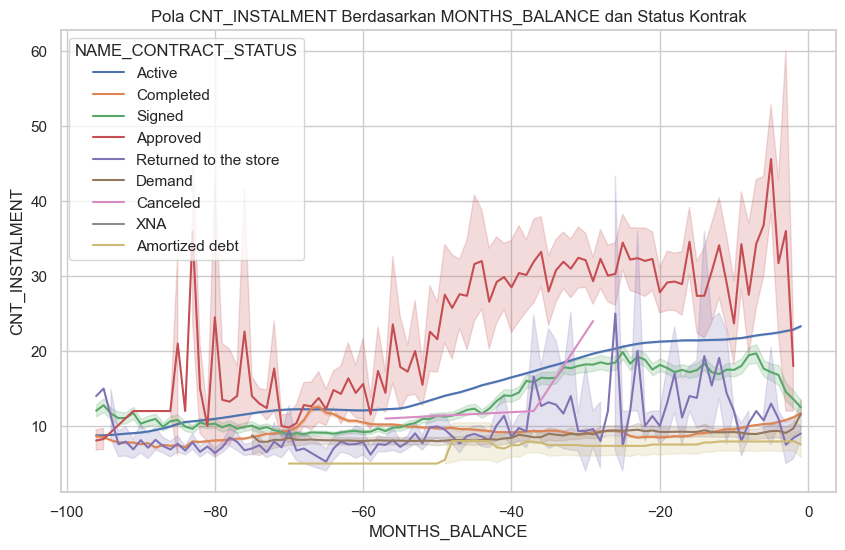

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTHS_BALANCE', y='CNT_INSTALMENT', hue='NAME_CONTRACT_STATUS', data=df_master)
plt.title('Pola CNT_INSTALMENT Berdasarkan MONTHS_BALANCE dan Status Kontrak')
plt.show()

### Pola CNT_INSTALMENT Berdasarkan MONTHS_BALANCE dan TARGET

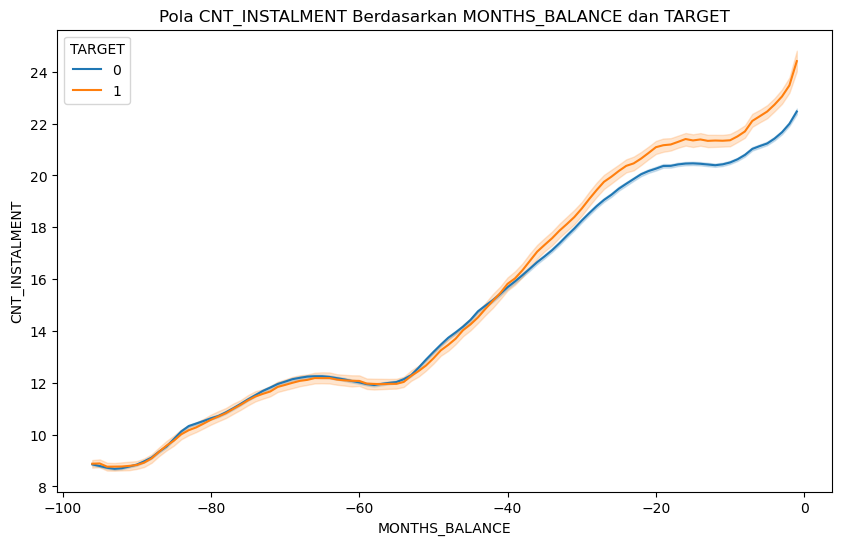

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTHS_BALANCE', y='CNT_INSTALMENT', hue='TARGET', data=df_merged)
plt.title('Pola CNT_INSTALMENT Berdasarkan MONTHS_BALANCE dan TARGET')
plt.show()

# Summary

## Combined Insights, Recommendations, and Conclusion
 tailored and effective customer solutions, ultimately driving growth and customer satisfaction.